___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Loading data

In [2]:
df=pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


Sampla size is small. All values are numerical. No missing value.

In [4]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


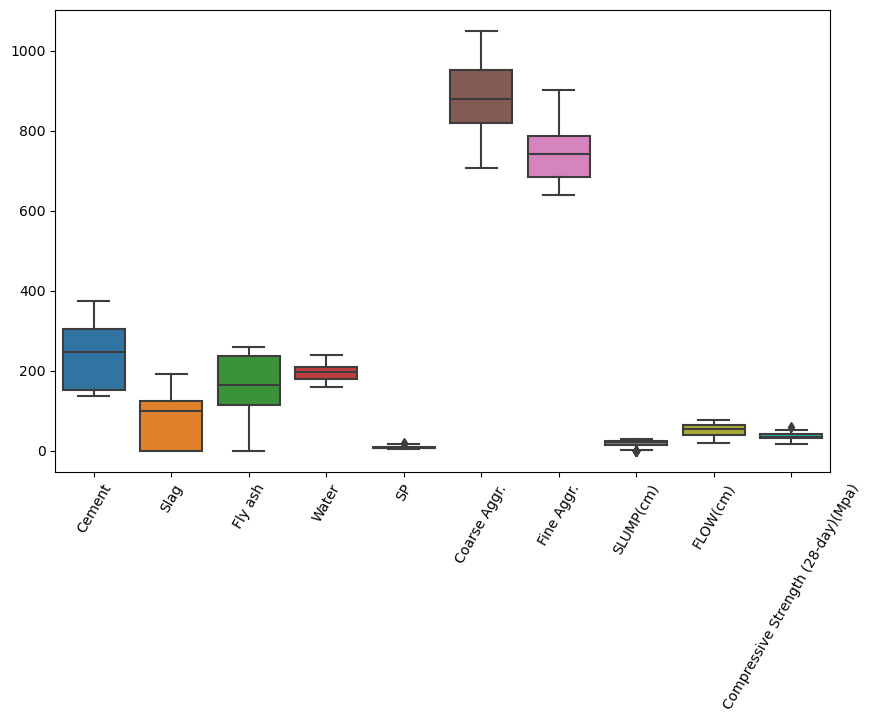

In [5]:
#checking for outliers:
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);

No outliers

In [6]:
#checking for correlation
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


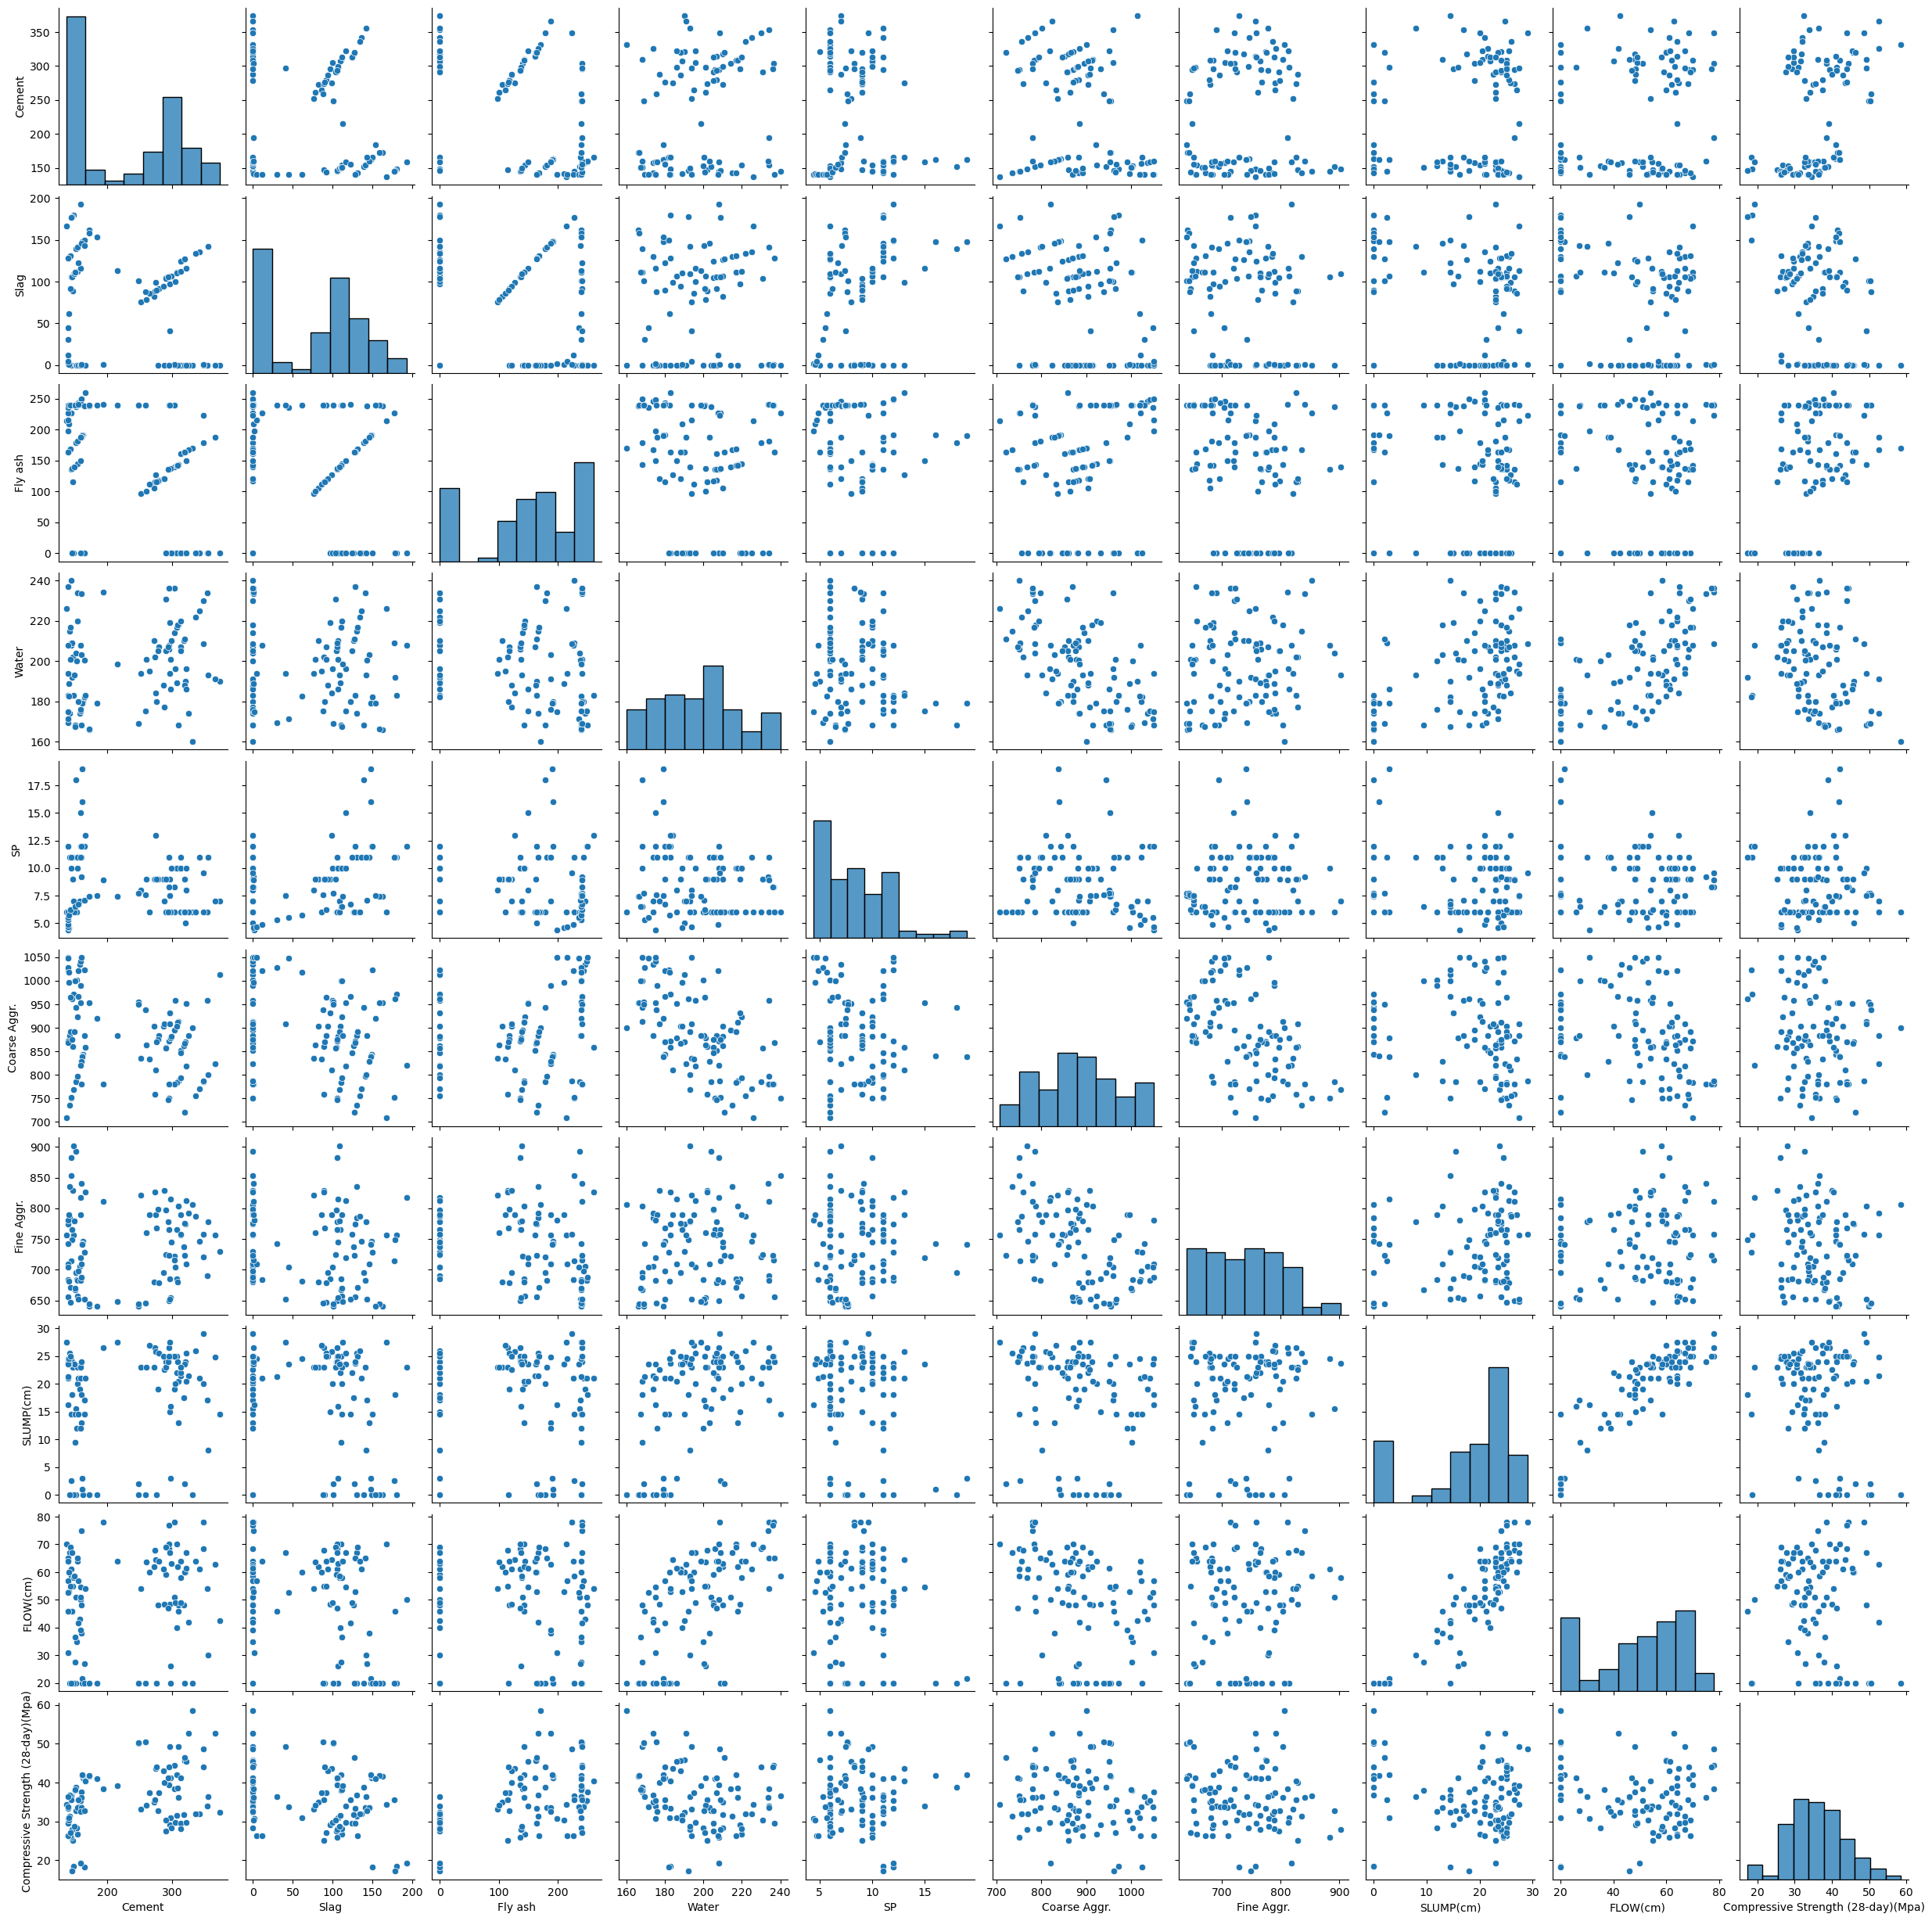

In [7]:
sns.pairplot(df)

<AxesSubplot:>

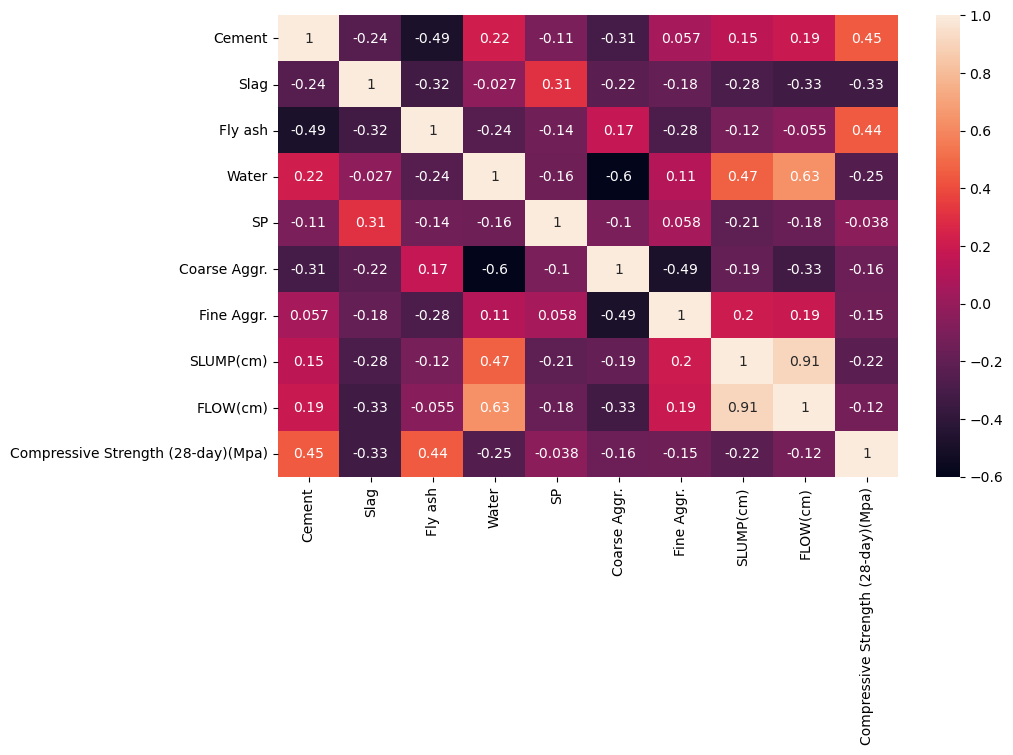

In [8]:
#visualizing correlation
sns.heatmap(df.corr(),annot=True)

Slump and flow seems strongly correlated. But we do not have lots of feautes. We may go on with all the features of we may drop flow or slump.

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [9]:
X=df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y=df["Compressive Strength (28-day)(Mpa)"]

In [10]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

### Splitting data into training and testing
* Split the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72, 9) (31, 9) (72,) (31,)


## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.01867817e+00,  4.89060387e-01, -7.01085388e-02,
        -1.99267756e-01, -5.39878038e-01, -1.37532719e+00,
         2.52572977e+00,  6.48505379e-01,  4.82444362e-01],
       [ 8.52113706e-01, -6.26114653e-01,  1.06779252e+00,
        -1.50862633e-01, -3.67117066e-01,  2.75612237e-01,
        -1.40263561e+00,  1.08244950e+00,  9.92185022e-01],
       [-8.80658652e-01,  1.86460669e+00, -1.63768284e+00,
         5.26809088e-01,  1.18773168e+00, -7.54320879e-01,
         1.20685410e+00,  5.61716555e-01,  2.93415534e-02],
       [ 8.63406212e-01,  4.56309284e-01, -9.26635646e-02,
         1.87973228e-01, -8.85399982e-01, -8.64461622e-02,
        -1.35239273e+00, -2.48312469e-01, -1.32996687e+00],
       [ 4.49347647e-01,  1.12422708e-01, -3.85878901e-01,
        -1.02457510e-01, -8.85399982e-01, -6.13715675e-01,
         7.67228879e-01,  1.02459028e+00,  5.95720064e-01],
       [-1.03122540e+00,  1.61549362e-01, -3.40768849e-01,
         2.36378351e-01,  1.51165851e-01, -2.973539

In [18]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.15199248, -1.2958747 ,  0.21182928, -0.34448313, -1.23092193,
        -0.18018296,  0.51601447,  0.67743499,  0.59572006],
       [-0.79282805, -1.2958747 ,  1.29447053, -0.68331899,  1.53325363,
        -0.30907107,  1.34816221,  0.33027969,  0.25589296],
       [ 0.87595344,  0.45630928, -1.63768284,  0.62361933,  0.49668779,
        -0.05129486,  0.06068834,  0.79315342,  0.76563362],
       [ 0.72538669,  0.24342712, -0.27310377, -0.44129337,  0.15116585,
         0.21819845, -0.7086558 ,  0.79315342,  0.65235792],
       [-0.86811142,  1.09495578,  0.4824896 ,  0.28478347,  0.84220974,
        -0.66058408, -0.48884319, -0.59546776, -0.65031266],
       [-1.05631986,  1.60259787,  0.9223126 ,  0.57521421,  0.84220974,
        -1.5628008 , -0.41033868, -1.8105113 , -1.66979398],
       [-0.92582868,  0.70358011,  1.06892027, -0.83337487, -0.64353462,
         0.95403234, -1.39164498, -0.42189012, -0.45208018],
       [ 1.1143508 ,  0.76744476, -1.63768284,  0.62361933, -0

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [20]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [21]:
lm.coef_

array([ 3.73690789, -2.84833966,  3.20875858, -5.16495691, -0.05694117,
       -5.83872896, -3.18557505, -2.41794917,  1.51351431])

### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [24]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  1.9919336865776538 Test: 1.715781934282176
Mean Squared Errors     :  Train:  6.237116156459256  Test: 4.438896026004771
Root Mean Squared Errors:  Train:  2.497421901973965  Test: 2.106868772848649
R2 Scores               :  Train:  0.9001468622637667 Test: 0.9212363726145721


The matrics seems good.

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge_model = Ridge(alpha=1)

In [27]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [28]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [29]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  2.0026012518838994 Test: 1.6989156334829867
Mean Squared Errors     :  Train:  6.313180517719284  Test: 4.398308336032762
Root Mean Squared Errors:  Train:  2.5126043297183274  Test: 2.0972144229984595
R2 Scores               :  Train:  0.8989291095474172 Test: 0.9219565592714937


Results are so close to Linear Regression

In [30]:
ridge_model.coef_

array([ 4.8930977 , -1.53407954,  4.56389199, -3.94753322,  0.13909195,
       -4.08634982, -1.84857226, -2.18856693,  1.18471435])

In [31]:
#Gridsearch

from sklearn.model_selection import GridSearchCV
alpha_space = np.linspace(0.01, 1, 100)
ridge_model = Ridge()
param_grid = {"alpha":alpha_space}
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......

[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.09 ......................................................
[CV] ....................................... alpha=0.09, total=   0.0s
[CV] alpha=0.09 ......................................................
[CV] ....................................... alpha=0.09, total=   0.0s
[CV] alpha=0.09 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ alpha=0.09999999999999999, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] ....................................... alpha=0.11, total=   0.0s
[CV] alpha=0.11 ......................................................
[CV] .

[CV] ........................................ alpha=0.2, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ........................................ alpha=0.2, total=   0.0s
[CV] alpha=0.2 .......................................................
[CV] ........................................ alpha=0.2, total=   0.0s
[CV] alpha=0.21000000000000002 .......................................
[CV] ........................ alpha=0.21000000000000002, total=   0.0s
[CV] alpha=0.21000000000000002 .......................................
[CV] ........................ alpha=0.21000000000000002, total=   0.0s
[CV] alpha=0.21000000000000002 .......................................
[CV] ........................ alpha=0.21000000000000002, total=   0.0s
[CV] alpha=0.21000000000000002 .......................................
[CV] ........................ alpha=0.21000000000000002, total=   0.0s
[CV] alpha=0.21000000000000002 .......................................
[CV] .

[CV] ........................ alpha=0.29000000000000004, total=   0.0s
[CV] alpha=0.29000000000000004 .......................................
[CV] ........................ alpha=0.29000000000000004, total=   0.0s
[CV] alpha=0.29000000000000004 .......................................
[CV] ........................ alpha=0.29000000000000004, total=   0.0s
[CV] alpha=0.29000000000000004 .......................................
[CV] ........................ alpha=0.29000000000000004, total=   0.0s
[CV] alpha=0.29000000000000004 .......................................
[CV] ........................ alpha=0.29000000000000004, total=   0.0s
[CV] alpha=0.3 .......................................................
[CV] ........................................ alpha=0.3, total=   0.0s
[CV] alpha=0.3 .......................................................
[CV] ........................................ alpha=0.3, total=   0.0s
[CV] alpha=0.3 .......................................................
[CV] .

[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.4 .......................................................
[CV] ........................................ alpha=0.4, total=   0.0s
[CV] alpha=0.41000000000000003 .......................................
[CV] ........................ alpha=0.41000000000000003, total=   0.0s
[CV] alpha=0.41000000000000003 .......................................
[CV] ........................ alpha=0.41000000000000003, total=   0.0s
[CV] alpha=0.41000000000000003 .......................................
[CV] ........................ alpha=0.41000000000000003, total=   0.0s
[CV] alpha=0.41000000000000003 .......................................
[CV] .

[CV] ....................................... alpha=0.52, total=   0.0s
[CV] alpha=0.52 ......................................................
[CV] ....................................... alpha=0.52, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] ....................................... alpha=0.53, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] ....................................... alpha=0.53, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] ....................................... alpha=0.53, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] ....................................... alpha=0.53, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] ....................................... alpha=0.53, total=   0.0s
[CV] alpha=0.53 ......................................................
[CV] .

[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .

[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] ....................................... alpha=0.66, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] ....................................... alpha=0.66, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] ....................................... alpha=0.66, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] ....................................... alpha=0.66, total=   0.0s
[CV] alpha=0.66 ......................................................
[CV] .

[CV] ....................................... alpha=0.72, total=   0.0s
[CV] alpha=0.72 ......................................................
[CV] ....................................... alpha=0.72, total=   0.0s
[CV] alpha=0.72 ......................................................
[CV] ....................................... alpha=0.72, total=   0.0s
[CV] alpha=0.72 ......................................................
[CV] ....................................... alpha=0.72, total=   0.0s
[CV] alpha=0.72 ......................................................
[CV] ....................................... alpha=0.72, total=   0.0s
[CV] alpha=0.73 ......................................................
[CV] ....................................... alpha=0.73, total=   0.0s
[CV] alpha=0.73 ......................................................
[CV] ....................................... alpha=0.73, total=   0.0s
[CV] alpha=0.73 ......................................................
[CV] .

[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] .

[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.86 ......................................................
[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.86 ......................................................
[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.86 ......................................................
[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.86 ......................................................
[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.86 ......................................................
[CV] ....................................... alpha=0.86, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] ....................................... alpha=0.87, total=   0.0s
[CV] alpha=0.87 ......................................................
[CV] .

[CV] ....................................... alpha=0.92, total=   0.0s
[CV] alpha=0.92 ......................................................
[CV] ....................................... alpha=0.92, total=   0.0s
[CV] alpha=0.92 ......................................................
[CV] ....................................... alpha=0.92, total=   0.0s
[CV] alpha=0.92 ......................................................
[CV] ....................................... alpha=0.92, total=   0.0s
[CV] alpha=0.92 ......................................................
[CV] ....................................... alpha=0.92, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ....................................... alpha=0.93, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ....................................... alpha=0.93, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] .

[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [32]:
grid_ridge.best_params_

{'alpha': 0.85}

In [36]:
grid_ridge.best_index_

84

In [37]:
pd.DataFrame(grid_ridge.cv_results_).loc[84, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2.888
mean_train_score   -2.485
Name: 84, dtype: object

In [38]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [39]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  2.000972539468706 Test: 1.6950008205364069
Mean Squared Errors     :  Train:  6.300345513461739  Test: 4.383664373018226
Root Mean Squared Errors:  Train:  2.5100489065876266  Test: 2.0937202231955983
R2 Scores               :  Train:  0.8991345916028775 Test: 0.9222164012771559


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [42]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [43]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  3.0158637172873544 Test: 2.5877756640840603
Mean Squared Errors     :  Train:  14.521030371222885  Test: 10.343206081048091
Root Mean Squared Errors:  Train:  3.8106469754128214  Test: 3.216085521413896
R2 Scores               :  Train:  0.7675255022742951 Test: 0.8164704861376072


In [51]:
#Gridsearch

from sklearn.model_selection import GridSearchCV

alpha_space = np.linspace(0.01, 1, 100)
lasso_model = Lasso(max_iter=100000)
param_lasso= {"alpha":alpha_space}
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] .

[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.32 ......................................................
[CV] ....................................... alpha=0.32, total=   0.0s
[CV] alpha=0.33 ......................................................
[CV] .

[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] ........................ alpha=0.48000000000000004, total=   0.0s
[CV] alpha=0.48000000000000004 .......................................
[CV] .

[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] ....................................... alpha=0.65, total=   0.0s
[CV] alpha=0.65 ......................................................
[CV] .

[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] ........................................ alpha=0.8, total=   0.0s
[CV] alpha=0.8 .......................................................
[CV] .

[CV] ....................................... alpha=0.93, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] ......................... alpha=0.9400000000000001, total=   0.0s
[CV] alpha=0.9400000000000001 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished


GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [52]:
grid_lasso.best_params_

{'alpha': 0.03}

In [53]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [54]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  2.0200001842199433 Test: 1.6591859949461552
Mean Squared Errors     :  Train:  6.417513843688393  Test: 4.275590530113656
Root Mean Squared Errors:  Train:  2.533281240543259  Test: 2.067750113073061
R2 Scores               :  Train:  0.8972587847198631 Test: 0.9241340600469893


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [57]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [58]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  3.869791673143993 Test: 3.7238072537583604
Mean Squared Errors     :  Train:  23.447843946864573  Test: 21.15293354486536
Root Mean Squared Errors:  Train:  4.842297383150334  Test: 4.599231842913049
R2 Scores               :  Train:  0.6246116422219841 Test: 0.6246630319620148


In [59]:
elastic_model = ElasticNet(max_iter=10000)
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.2, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.2, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.2, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.2, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.2, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.2, l1_ratio=0.1 .........................................
[CV] .

[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.6, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.6, l1_ratio=0.7 .........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.99, total=   0.0s
[CV] alpha=1, l1_ratio=0.99 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    0.6s finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [60]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.1}

In [61]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [62]:
r2Train = r2_score(y_train, y_train_pred)
maeTrain = mean_absolute_error(y_train, y_train_pred)
mseTrain = mean_squared_error(y_train, y_train_pred)
rmseTrain = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2Test = r2_score(y_test, y_pred)
maeTest = mean_absolute_error(y_test, y_pred)
mseTest = mean_squared_error(y_test, y_pred)
rmseTest = np.sqrt(mean_squared_error(y_test, y_pred))




print("Mean Absolute Errors    :  Train: ",maeTrain, "Test:",maeTest)
print("Mean Squared Errors     :  Train: ",mseTrain, " Test:",mseTest)
print("Root Mean Squared Errors:  Train: ",rmseTrain, " Test:",rmseTest)
print("R2 Scores               :  Train: ",r2Train, "Test:",r2Test)

Mean Absolute Errors    :  Train:  2.0010150408394693 Test: 1.693153320446231
Mean Squared Errors     :  Train:  6.29761904288668  Test: 4.377889725642385
Root Mean Squared Errors:  Train:  2.509505736771024  Test: 2.0923407288590417
R2 Scores               :  Train:  0.8991782410451895 Test: 0.9223188664332506


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___